In [28]:
### Gene usage analysis ###
# all combined data sets

# Quantifying the VDJ gene based on either sequence count or clonotypes.
# options are based on "gene", "allele", "family"
# duplicate count does not work... missing the column. 

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

require(data.table)
db <- as.data.frame(fread("/home/phil/processed_docker/a_r_vac_wt/changeo_10x/new_a_r_vac_wt.tsv"))

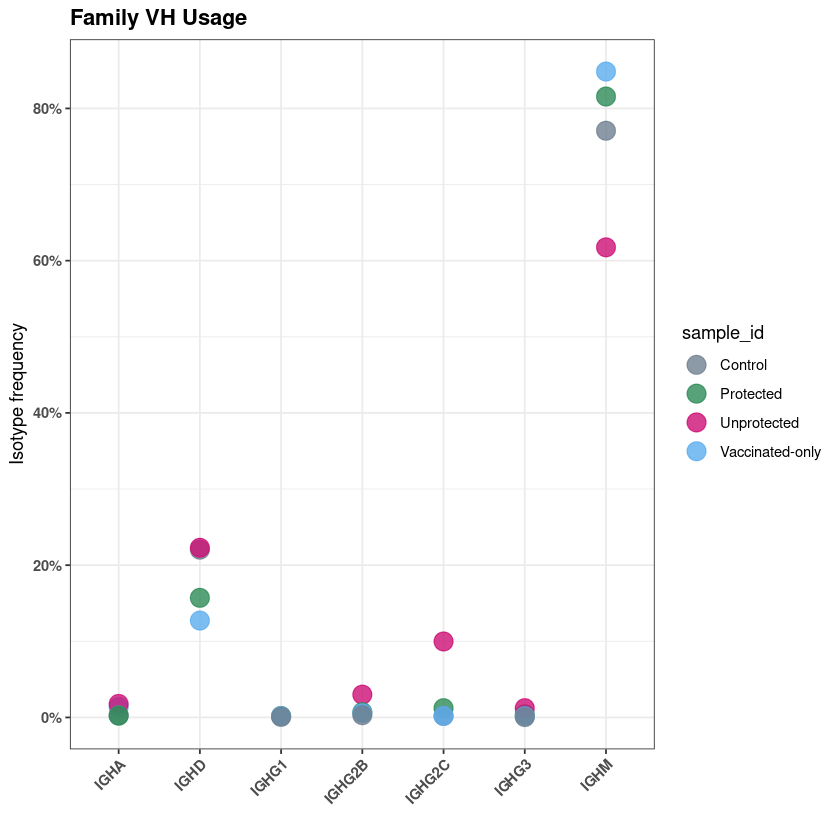

In [29]:
# Quantify V gene based on the family.
family_c <- countGenes(db, gene="c_call", groups="sample_id", mode="family")

# manual color codes
sample_colors <- c("Protected"="seagreen", "Unprotected"="deeppink3", "Vaccinated-only"="steelblue2", "Control"="slategrey")

# Plot V family usage by sample
gc <- ggplot(family_c, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Family VH Usage") +
    theme(plot.title = element_text(face="bold"),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1, face="bold"),
          axis.text.y=element_text(face="bold")) +
    ylab("Isotype frequency") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(gc)

In [30]:
# Quantify usage at the gene level.
# Printing the first 4 genes.
gene <- countGenes(db, groups="sample_id", gene="v_call", mode="gene")
head(gene, n=10)

sample_id,gene,seq_count,seq_freq
<chr>,<chr>,<int>,<dbl>
Control,IGHV1-26,253,0.05676464
Vaccinated-only,IGHV1-26,185,0.06081525
Control,IGHV3-6,170,0.03814225
Protected,IGHV1-26,165,0.06084071
Control,IGHV1-64,162,0.03634732
Control,IGHV1-80,148,0.03320619
Control,IGHV9-3,146,0.03275746
Control,IGHV1-82,140,0.03141126
Control,IGHV1-69,131,0.02939197


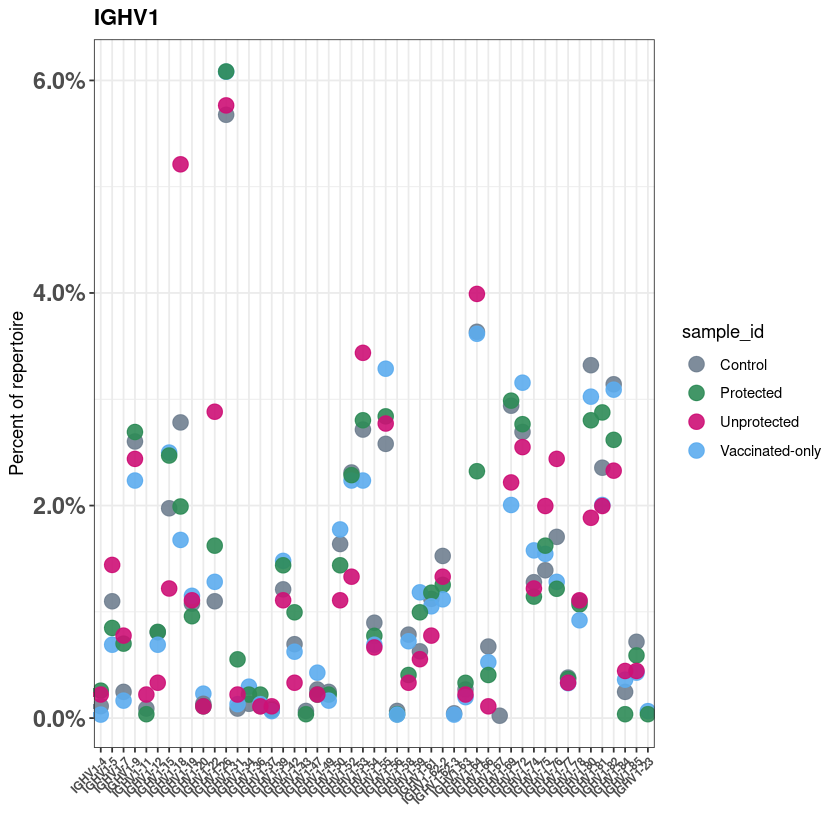

In [31]:
# manual color codes
sample_colors <- c("Protected"="seagreen", "Unprotected"="deeppink3", "Vaccinated-only"="steelblue2", "Control"="slategrey")

# Assign sorted levels and subset to IGHV1
ighv1 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method=c("name", "position")))) %>%
    filter(getFamily(gene) == "IGHV1")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(ighv1, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGHV1") +
    theme(plot.title = element_text(face="bold"),
                                    axis.text.x=element_text(angle=45, hjust=1, vjust=1, face="bold", size=10)) +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1, face="bold",size=7),
          axis.text.y=element_text(face="bold", size=14)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=4, alpha=0.9)
plot(g1)

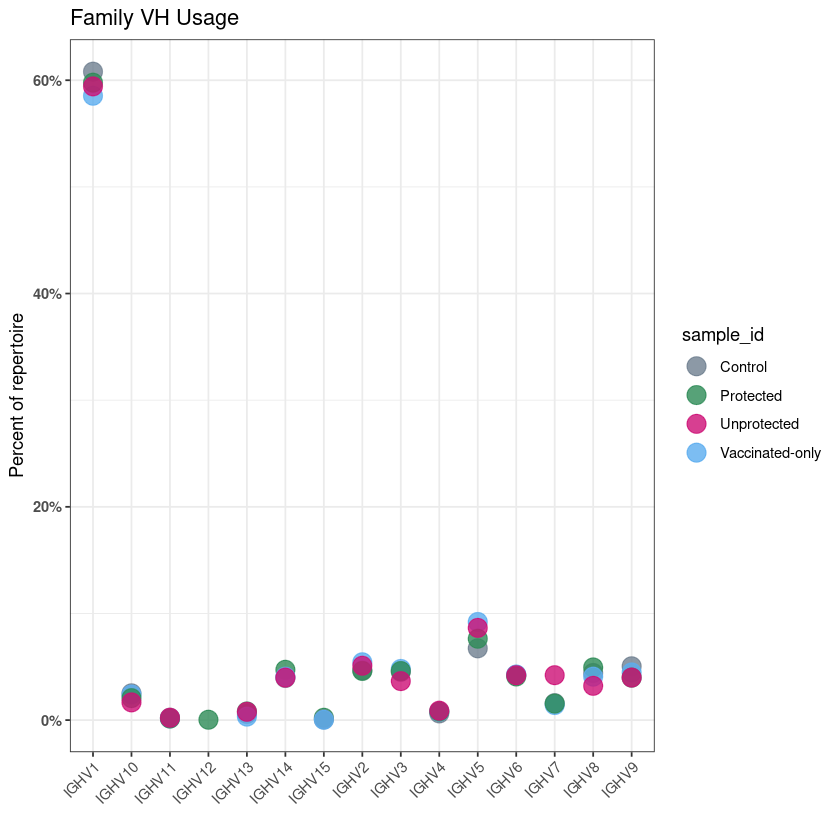

In [32]:
# Quantify V gene based on the family.
family_v <- countGenes(db, gene="v_call", groups="sample_id", mode="family")

# Plot V family usage by sample
g2 <- ggplot(family_v, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Family VH Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1),
          axis.text.y=element_text(face="bold")) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g2)

In [33]:
# Quantify V family clonal usage by sample and isotype
family <- countGenes(db, gene="v_call", groups=c("sample_id", "c_call"), 
                     clone="clone_id", mode="allele", remove_na = TRUE)
head(family, n=4)

# glimpse(db)

sample_id,c_call,gene,clone_count,clone_freq
<chr>,<chr>,<chr>,<int>,<dbl>
Control,IGHA,IGHV1-12*01,1,0.08333333
Control,IGHA,IGHV1-52*01,1,0.08333333
Control,IGHA,IGHV1-53*01,1,0.08333333
Control,IGHA,IGHV1-55*01,1,0.08333333


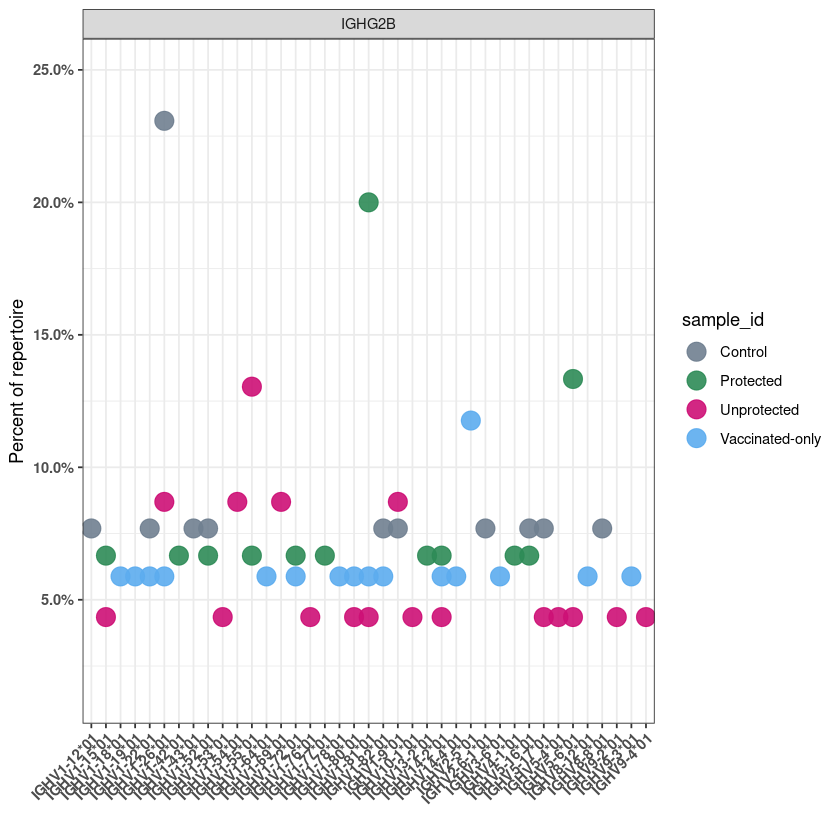

In [34]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHG2B"))
# Plot V family clonal usage by sample and isotype
IGHG1 <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(plot.title = element_text(face="bold"),
                                    axis.text.x=element_text(angle=45, hjust=1, vjust=1, face="bold")) +
    ylab("Percent of repertoire") +
    xlab("") + theme(axis.text.y=element_text(face="bold")) +
    scale_y_continuous(labels=percent, limits=c(0.015,0.25)) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(IGHG1)

ggsave(IGHG1, filename="allel_IGHG2B.pdf", width = 8.5, height = 5, dpi = 600)

# # Subset to IGHM and IGHG for plotting
# family <- filter(family, c_call %in% c("IGHG2C"))
# # Plot V family clonal usage by sample and isotype
# IGHG1 <- ggplot(family, aes(x=gene, y=clone_freq)) +
#     theme_bw() +
#     theme(plot.title = element_text(face="bold"), legend.position="none",
#                                     axis.text.x=element_text(angle=45, hjust=1, vjust=1, face="bold")) +
#     ylab("") +
#     xlab("") +
#     scale_y_continuous(labels=percent, limits=c(0.015,0.25)) +
#     scale_color_manual(values=sample_colors) +
#     geom_point(aes(color=sample_id), size=5, alpha=0.9) +
#     facet_grid(. ~ c_call)
# plot(IGHG1)

# ggsave(IGHG1, filename="allel_IGHG2C.pdf", width = 7.5, height = 5, dpi = 600)

# # ggsave(IGHG2B, filename="allel_IGHG2B.pdf", width = 8.5, height = 5, dpi = 600)

# # Subset to IGHM and IGHG for plotting
# family <- filter(family, c_call %in% c("IGHG3"))
# # Plot V family clonal usage by sample and isotype
# IGHG3 <- ggplot(family, aes(x=gene, y=clone_freq)) +
#     theme_bw() +
#     theme(plot.title = element_text(face="bold"),
#                                     axis.text.x=element_text(angle=45, hjust=1, vjust=1, face="bold")) +
#     ylab("Percent of repertoire") +
#     xlab("") + theme(axis.text.y=element_text(face="bold")) +
#     scale_y_continuous(labels=percent, limits=c(0.09,0.5)) +
#     scale_color_manual(values=sample_colors) +
#     geom_point(aes(color=sample_id), size=5, alpha=0.9) +
#     facet_grid(. ~ c_call)
# plot(fob)

# # ggsave(fob, filename="allel_IGHG3.pdf", width = 6.5, height = 5, dpi = 600)

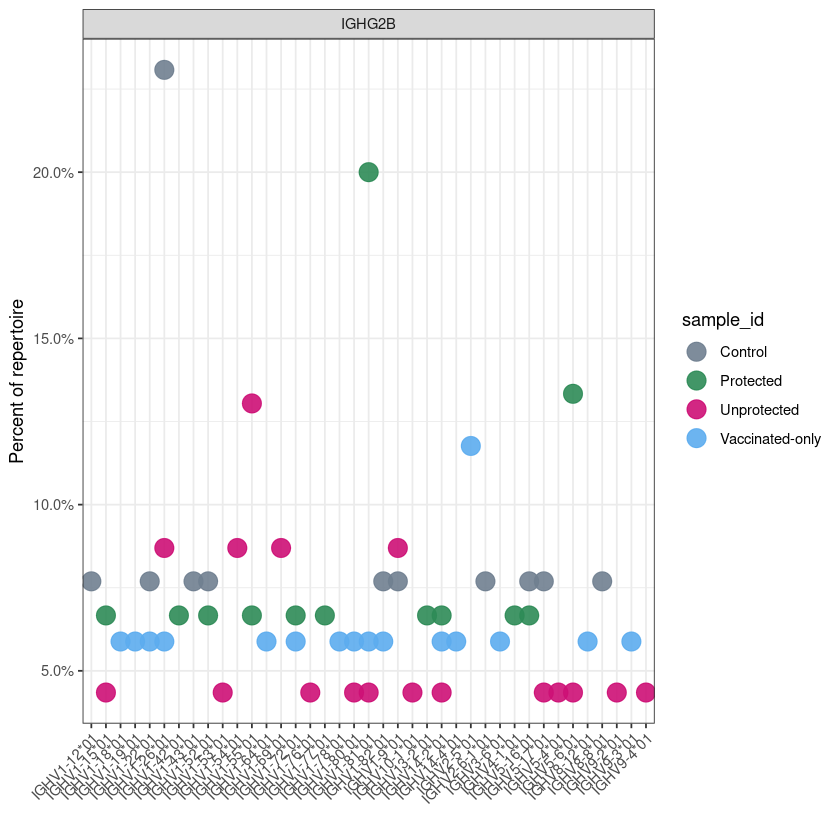

In [35]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHG2B"))
# Plot V family clonal usage by sample and isotype
IGHG2B <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(IGHG2B)

ggsave(IGHG2B, filename="allel_IGHG2B.pdf", width = 12, height = 5, dpi = 600)

ERROR: Error: Faceting variables must have at least one value


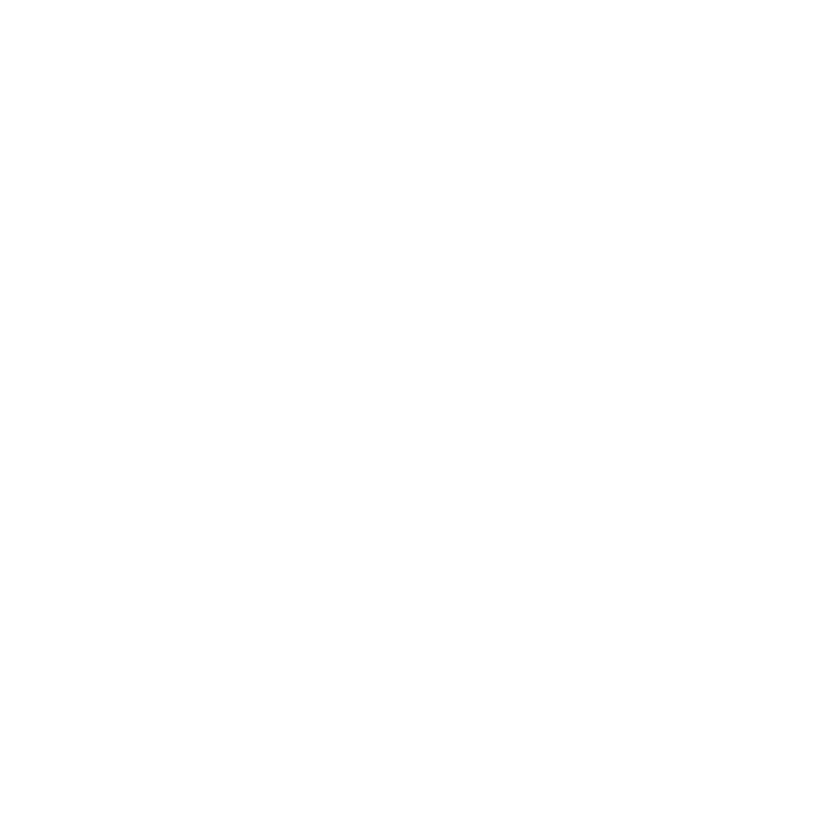

In [36]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHA"))
# Plot V family clonal usage by sample and isotype
IGHA <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(IGHA)

ggsave(IGHA, filename="allel_IGHA.pdf", width = 16, height = 5, dpi = 600)

In [ ]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHM"))
# Plot V family clonal usage by sample and isotype
g3 <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(g3)

ggsave(g3, filename="allel_IGHM.pdf", width = 16, height = 5, dpi = 600)

In [ ]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHG1"))
# Plot V family clonal usage by sample and isotype
g4 <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(g4)

ggsave(g4, filename="allel_IGHG1.pdf", width = 5, height = 5, dpi = 600)

In [ ]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHG2C"))
# Plot V family clonal usage by sample and isotype
IGHG2C <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(IGHG2C)

ggsave(IGHG2C, filename="allel_IGHG2C.pdf", width = 10, height = 5, dpi = 600)

In [ ]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHG3"))
# Plot V family clonal usage by sample and isotype
IGHG3 <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(IGHG3)

ggsave(IGHG3, filename="allel_IGHG3.pdf", width = 5, height = 5, dpi = 600)

In [ ]:
# Subset to IGHM and IGHG for plotting
family <- filter(family, c_call %in% c("IGHG2B"))
# Plot V family clonal usage by sample and isotype
IGHG2B <- ggplot(family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.9) +
    facet_grid(. ~ c_call)
plot(IGHG2B)

ggsave(IGHG2B, filename="allel_IGHG2B.pdf", width = 10, height = 5, dpi = 600)